# Projet : Schéma de Crank-Nicolson

### Problème à Résoudre

Considérons le problème aux limites associé à l'équation de la chaleur avec conditions de Dirichlet où l'on impose aux bords les valeurs de la solution :

$$
\begin{cases}
\frac{\partial u}{\partial t}(t,x) = K \frac{\partial^2 u}{\partial x^2}(t,x), & \text{pour } x \in (0,1), \, t \in [0,T], \\
u(t,a) = u_a(t), & \text{pour } t \in [0,T], \\
u(t,b) = u_b(t), & \text{pour } t \in [0,T], \\
u(0,x) = u_0(x), & \text{pour } x \in [a,b],
\end{cases}
$$

où $u_a$, $u_b$ et $u_0$ sont des fonctions données telles que $u_0(a) = u_a(0)$ et $u_0(b) = u_b(0)$.

### Méthode de Résolution

Nous allons résoudre ce problème en utilisant le **schéma de Crank-Nicolson**, qui combine les méthodes aux différences finies explicites et implicites.

### Discrétisation Spatiale

Pour approcher la solution, nous définissons les paramètres suivants :

- **Nombre de points intérieurs :** Fixons $N > 0$, le nombre de points intérieurs dans l'intervalle $]a, b[$.
- **Pas de discrétisation en espace :** 
  $$
  h = \frac{b - a}{N + 1}
  $$
- **Points intérieurs :** Nous posons
  $$
  x_i = a + ih \quad \text{pour} \quad 1 \leq i \leq N
  $$

### Discrétisation Temporelle

- **Pas de temps :** Notons $k$ le pas de temps.
- **Nombre de pas de temps :** Le nombre total de pas de temps pour atteindre le temps final $T$ est donné par
  $$
  M = \frac{T}{k}
  $$

### Approximation de la Solution

Nous cherchons une approximation de la solution $u(t_n, x_i)$, notée $u_i^n$.

### Valeurs aux Bords

Les valeurs aux bords, $u_0^n$ et $u_{N+1}^n$, sont spécifiées par les conditions de Dirichlet et ne sont donc pas des inconnues dans ce problème.


Soit $ \theta \in [0, 1] $. Nous définissons le schéma suivant :

$$
{u_i}^{n+1} = {u_i}^{n} + K \frac{\Delta t}{\Delta x^2}
\left( \theta \left( {u_{i+1}}^{n+1} - 2 {u_i}^{n+1} + {u_{i-1}}^{n+1} \right) + (1-\theta) \left( {u_{i+1}}^{n} - 2 {u_i}^{n} + {u_{i-1}}^{n} \right) \right)
$$

On remarque que :

- Si  $\theta = 0 $ , il s'agit du **schéma explicite**.
- Si  $\theta = 1 $ , il s'agit du **schéma implicite**.


Ainsi, nous allons donner un schéma regroupant les schémas explicite et implicite puis le résoudre. Pour étudier la convergence de la méthode($L^\infty$-stabilité et consistance), nous prendrons un exemple sur lequel nous allons appliquer cette méthode et le visualiser, mais également faire varier les paramètres du problème pour voir s'ils ont de l'influence sur la précision. Lorsqu'on parle de convergence, il est tout à fait naturel de parler de l'ordre de cette convergence, donc à travers des exemples où l'on a convergence, on fera varier $\theta$ pour choper ce dernier.

# 1) Relation matricielle entre $U^n$ et $U^{n+1}$:



On pose 

$$
\lambda = K \frac{\Delta t}{\Delta x^2} \quad \text{et} \quad \gamma = 1 - \theta.
$$

Le schéma peut être réécrit sous forme matricielle comme suit :

$$
\begin{pmatrix}
1 + 2 \lambda \theta & -\lambda \theta & 0 & \cdots & \cdots & 0 \\
-\lambda \theta & 1 + 2 \lambda \theta & -\lambda \theta & \cdots & \cdots & 0 \\
0 & -\lambda \theta & 1 + 2 \lambda \theta & \cdots & \cdots & 0 \\
\vdots & \vdots & \vdots & \ddots & \cdots & \vdots \\
0 & \cdots & 0 & \cdots & 1 + 2 \lambda \theta & -\lambda \theta \\
0 & \cdots & 0 & \cdots & -\lambda \theta & 1 + 2 \lambda \theta
\end{pmatrix}
\begin{pmatrix}
u_{1}^{n+1} \\
u_{2}^{n+1} \\
u_{3}^{n+1} \\
\vdots \\
u_{N-1}^{n+1} \\
u_{N}^{n+1}
\end{pmatrix}
=
\begin{pmatrix}
1 - 2 \lambda \gamma & \lambda \gamma & 0 & \cdots & \cdots & 0 \\
\lambda \gamma & 1 - 2 \lambda \gamma & \lambda \gamma & \cdots & \cdots & 0 \\
0 & \lambda \gamma & 1 - 2 \lambda \gamma & \cdots & \cdots & 0 \\
\vdots & \vdots & \vdots & \ddots & \cdots & \vdots \\
0 & \cdots & 0 & \cdots & 1 - 2 \lambda \gamma & \lambda \gamma \\
0 & \cdots & 0 & \cdots & \lambda \gamma & 1 - 2 \lambda \gamma
\end{pmatrix}
\begin{pmatrix}
u_{1}^{n} \\
u_{2}^{n} \\
u_{3}^{n} \\
\vdots \\
u_{N-1}^{n} \\
u_{N}^{n}
\end{pmatrix}
+
\begin{pmatrix}
(\gamma \lambda) u_{0}^{n} + (\theta \lambda) u_{0}^{n+1} \\
0 \\
\vdots \\
0 \\
(\gamma \lambda) u_{N+1}^{n} + (\theta \lambda) u_{N+1}^{n+1}
\end{pmatrix}
$$

On a ainsi la relation matricielle suivante :

$$
\boxed{A_1 U^{n+1} = A_2 U^n + B} \quad \text{(1)}
$$


# 2) Pseudo code effectuant la résolution de (1)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

L = ? #longueur du domaine
T = ? #temps d'expérience
N = ? #discrétisation en espace
M = ? #discretisation en temps
theta=?
k=?
h = L/(N+1) #pas d'espace
dx=h*h
dt =? #pas de temps
xx = np.linspace(h,L-h,N) #points de discretisation
tt = np.linspace(0,T,M+1)
#D = 0.2 #coefficient de diffusion
lam =k*dt/dx# si lam<1/2, le schéma converge ; si lam>1/2 le schéma diverge
print(lam)

#montage de la matrice A
diag0 = np.ones(N,)
diag1 = np.ones(N-1,)
A2 = np.diag(diag0,k = 0)*(1-2*(1-theta)*lam) + (np.diag(diag1,k=1) + np.diag(diag1,k=-1))*(1-theta)*lam
A1=np.diag(diag0,k = 0)*(1+2*theta*lam) +  (np.diag(diag1,k=1)+ np.diag(diag1,k=-1))*(-theta*lam)
b=?

A=np.linalg.inv(A1)@A2
B=np.linalg.inv(A1)@b

#condition initiale
U0 =?
U = U0
plt.plot(xx,U0)
#boucle sur le temps
for t in tt:
    U = np.matmul(A,U) + B
    plt.plot(xx,U)

# 3) Application pour $\theta=0.25$

<Figure size 432x288 with 0 Axes>

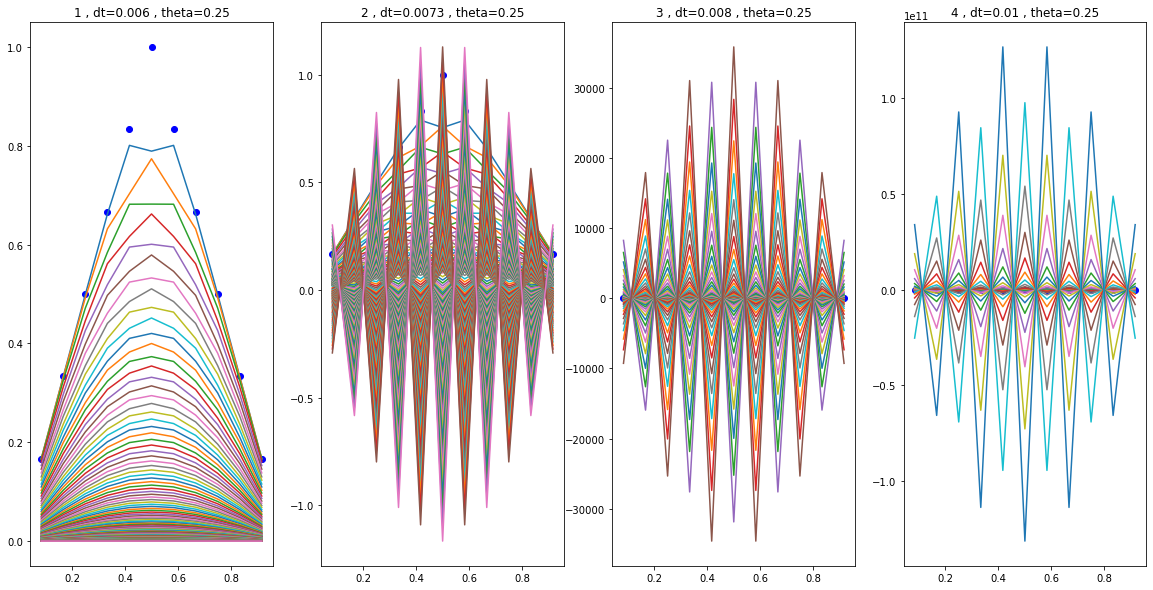

In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt

L = 1 #longueur du domaine
T = 1 #temps d'expérience
N = 11 #discrétisation en espace
h = L/(N+1) #pas d'espace
k=1
xx = np.linspace(h,L-h,N) #points de discretisation


dx2=h*h                 
theta=0.25

M=[0,0,0,0]
plt.figure()
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 10))
for i, dt in enumerate([0.006, 0.0073, 0.008, 0.01],start=1): #pas de temps
    M[i-1]=math.floor(T/dt)
    tt = np.linspace(0,T,M[i-1]+1)
    lam =k*dt/dx2

    #montage de la matrice A=(A1)^-1*A2 et B=(A1)^-1*b
    diag0 = np.ones(N,)
    diag1 = np.ones(N-1,)
    A2 = np.diag(diag0,k = 0)*(1-2*(1-theta)*lam) + (np.diag(diag1,k=1) + np.diag(diag1,k=-1))*(1-theta)*lam
    A1=np.diag(diag0,k = 0)*(1+2*theta*lam) +  (np.diag(diag1,k=1)+ np.diag(diag1,k=-1))*(-theta*lam)
    b=[0]*xx

    A=np.linalg.inv(A1)@A2
    B=np.linalg.inv(A1)@b

    
    
    
    #condition initiale
    U0 = 1-np.absolute(2*xx-1)
    U = U0
    axes[i-1].set_title( f'{i} , dt={dt} , theta={0.25}')
    axes[i-1].plot(xx,U0,'bo')
    #boucle sur le temps
    for t in tt:
        U = np.matmul(A,U) + B
        axes[i-1].plot(xx,U)
plt.show()   

# Pour tout dt<0.0073 le schéma est L_infini stable(est ce que abs(uij) bornée ?) car les graphes de la solution approchée uij
#en temps sont en dessous (bornées) du graphe de la condition initiale .
#On constate alors ici que le théta-schéma converge uniquement pour les valeurs de lambda<1.

# 4) Application pour $\theta=0.75$

<Figure size 432x288 with 0 Axes>

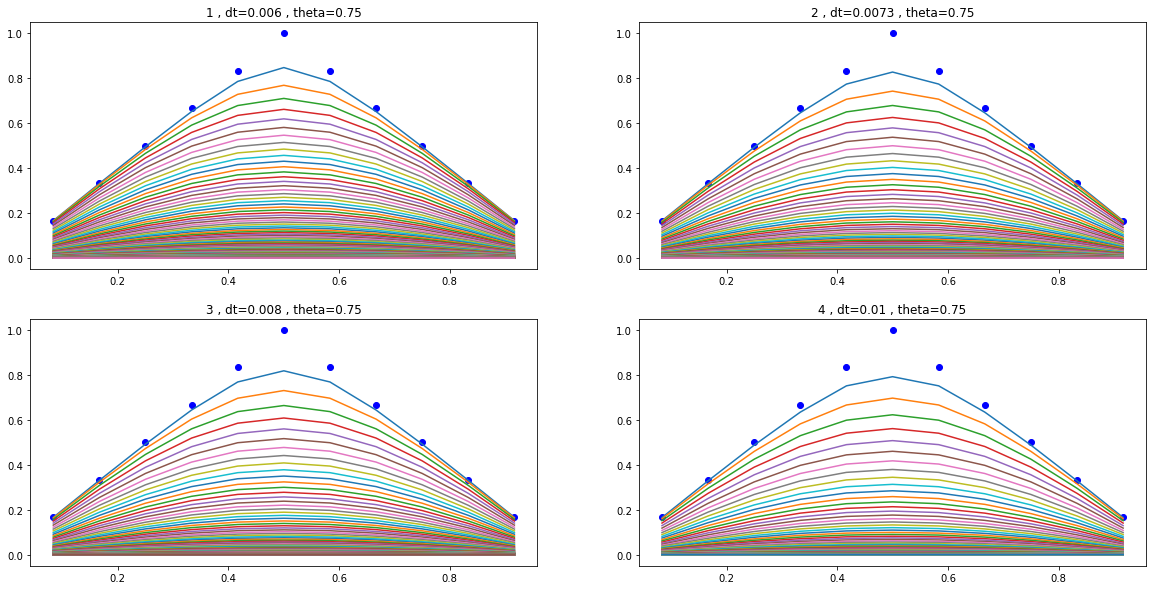

In [3]:
L = 1 #longueur du domaine
T = 1 #temps d'expérience
N = 11 #discrétisation en espaces
h = L/(N+1) #pas d'espace
k=1
xx = np.linspace(h,L-h,N) #points de discretisation


dx2=h*h                 
theta=0.75

M=[0,0,0,0]
plt.figure()
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 10))
for i, dt in enumerate([0.006, 0.0073, 0.008, 0.01],start=1): #pas de temps
    M[i-1]=math.floor(T/dt)
    tt = np.linspace(0,T,M[i-1]+1)
    lam =k*dt/dx2# 

    #montage de la matrice A=(A1)^-1*A2 et B=(A1)^-1*b
    diag0 = np.ones(N,)
    diag1 = np.ones(N-1,)
    A2 = np.diag(diag0,k = 0)*(1-2*(1-theta)*lam) + (np.diag(diag1,k=1) + np.diag(diag1,k=-1))*(1-theta)*lam
    A1=np.diag(diag0,k = 0)*(1+2*theta*lam) +  (np.diag(diag1,k=1)+ np.diag(diag1,k=-1))*(-theta*lam)
    b=[0]*xx

    A=np.linalg.inv(A1)@A2
    B=np.linalg.inv(A1)@b

    
    
    
    #condition initiale
    U0 = 1-np.absolute(2*xx-1)
    U = U0
    plt.subplot(2,2,i)
    plt.title( f'{i} , dt={dt} , theta={0.75}')
    plt.plot(xx,U0,'bo')
    #boucle sur le temps
    for t in tt:
        U = np.matmul(A,U) + B
        plt.plot(xx,U)
plt.show()   

#Oui , ça arrange les choses car pour theta=0.75 , on observe plus de divergence pour dt>=0.0073 .
#Ici le théta-schema converge meme pour les valeurs de lambda>1 .

# 5) Ordre de convergence du schéma

En prenant $u_0(x) = \sin(\pi x)$ , $k=1$, $a=0$ , $b=1$ , $u_0(t)=0$ et $u_1(t)=0$  

on remarque que la fonction $u(t,x) = e^{-\pi^2 t} \sin (\pi x)$ est une solution de :


\begin{cases}
\frac{\partial u}{\partial t}(t,x) = \frac{\partial^2 u}{\partial x^2}(t,x), \, \text{ pour } x \in (0,1), \, t\in [0,T] \\
u(t,0)=u_0(t) = 0 \, \text{ pour } t \in [0,T], \\
u(t,1)=u_1(t)=0 \, \text{ pour } t \in [0,T], \\
u(0,x)=u_0(x) = \sin ( \pi x) \, \text{ pour } x \in [0,1]
\end{cases}

La fonction  $u(t,x) = e^{-\pi^2 t} \sin (\pi x)$ est notre solution exacte .

In [5]:
#On commence par créer une fonction qui renvoie la valeur de l'erreur pour M,N et théta données :

def erreur(M,N,theta):
    T=1
    k=1
    L = 1
    h = L/(N+1)
    dx2=h*h 
    xx = np.linspace(h,L-h,N)
    dt=0.0003
    tt = np.linspace(0,T,M+1)
    lam =k*dt/dx2

    #montage de la matrice A=(A1)^-1*A2 et B=(A1)^-1*b
    diag0 = np.ones(N,)
    diag1 = np.ones(N-1,)
    A2 = np.diag(diag0,k = 0)*(1-2*(1-theta)*lam) + (np.diag(diag1,k=1) + np.diag(diag1,k=-1))*(1-theta)*lam
    A1=np.diag(diag0,k = 0)*(1+2*theta*lam) +  (np.diag(diag1,k=1)+ np.diag(diag1,k=-1))*(-theta*lam)
    b=[0]*xx

    A=np.linalg.inv(A1)@A2
    B=np.linalg.inv(A1)@b

    #condition initiale
    U0 = np.sin(np.pi * xx)
    U = U0
    #boucle sur le temps
    for t in tt:
        U = np.matmul(A,U) + B
    #solution exacte
    Uex = np.sin(np.pi*xx)*np.exp(-T*np.pi**2)
    #comparaison
    err= max(np.abs(U-Uex))
    return err    


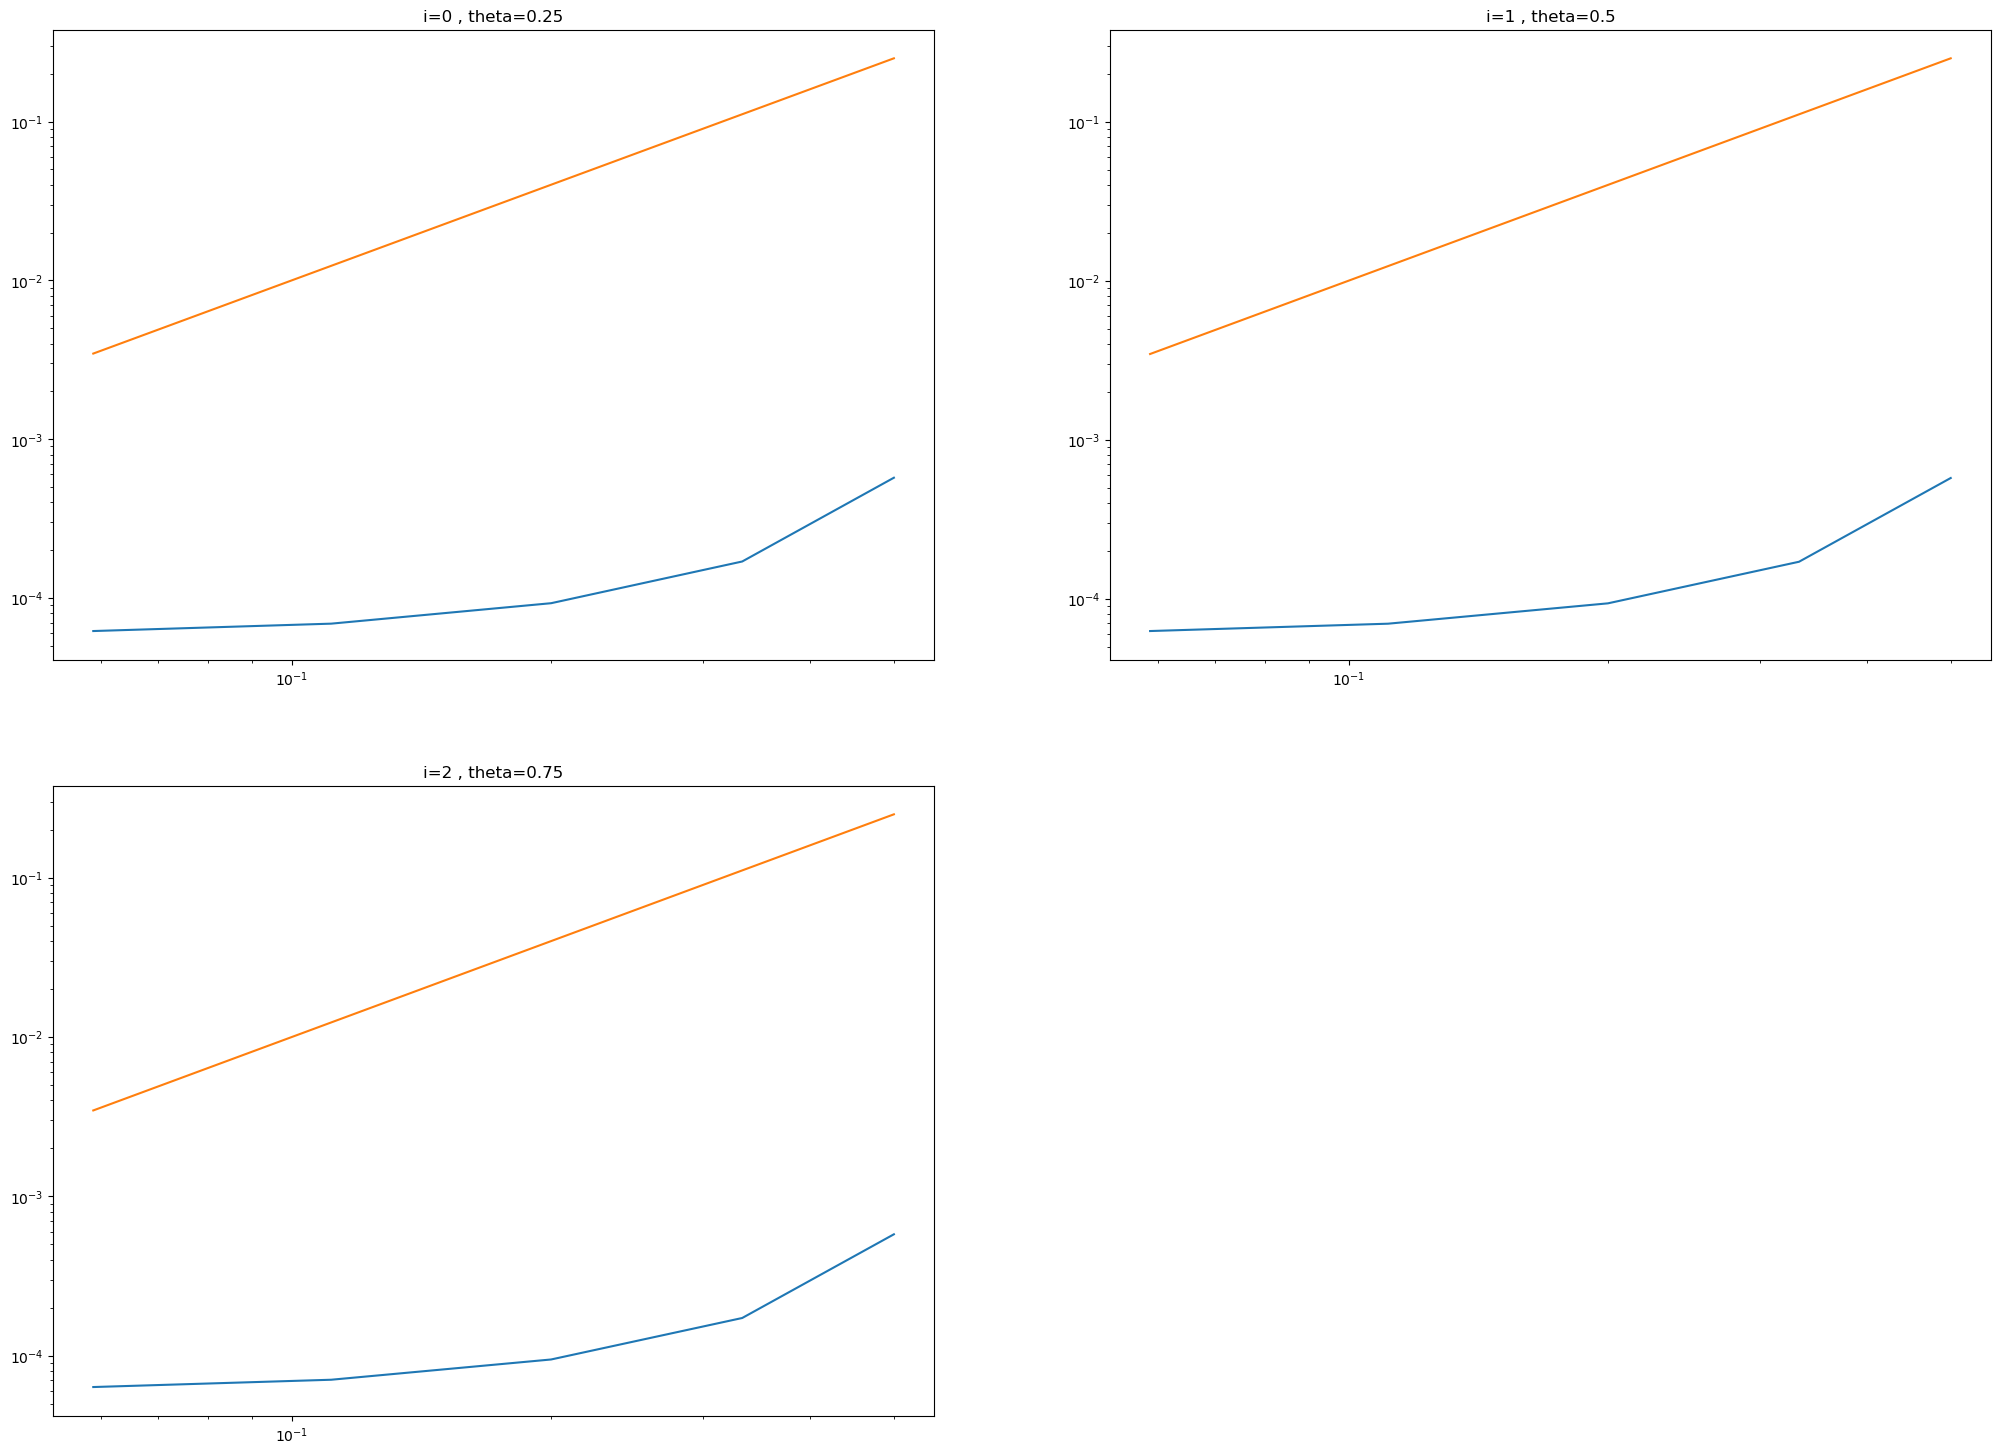

In [14]:
#On trace l'erreur de convergence en espace

NN = np.power(2,range(5))
M = 3*2**10 
hh = 1/(NN+1)
err_tot_esp=[[],[],[]]
figure=plt.figure(figsize=(25,18))
for i, theta in enumerate([0.25, 0.50, 0.75],start=0):
    err_tot_esp[i]= [erreur(M,N,theta) for N in NN]
    plt.subplot(2,2,i+1)
    plt.title( f'i={i} , theta={theta}')
    plt.loglog(hh,err_tot_esp[i]) #tracé de l'erreur pour chaque theta
    plt.loglog(hh,hh*hh) #comparaison d'ordre deux en espace
    
#Il semble y avoir convergence d'ordre 2 en espace pour chaque theta.   

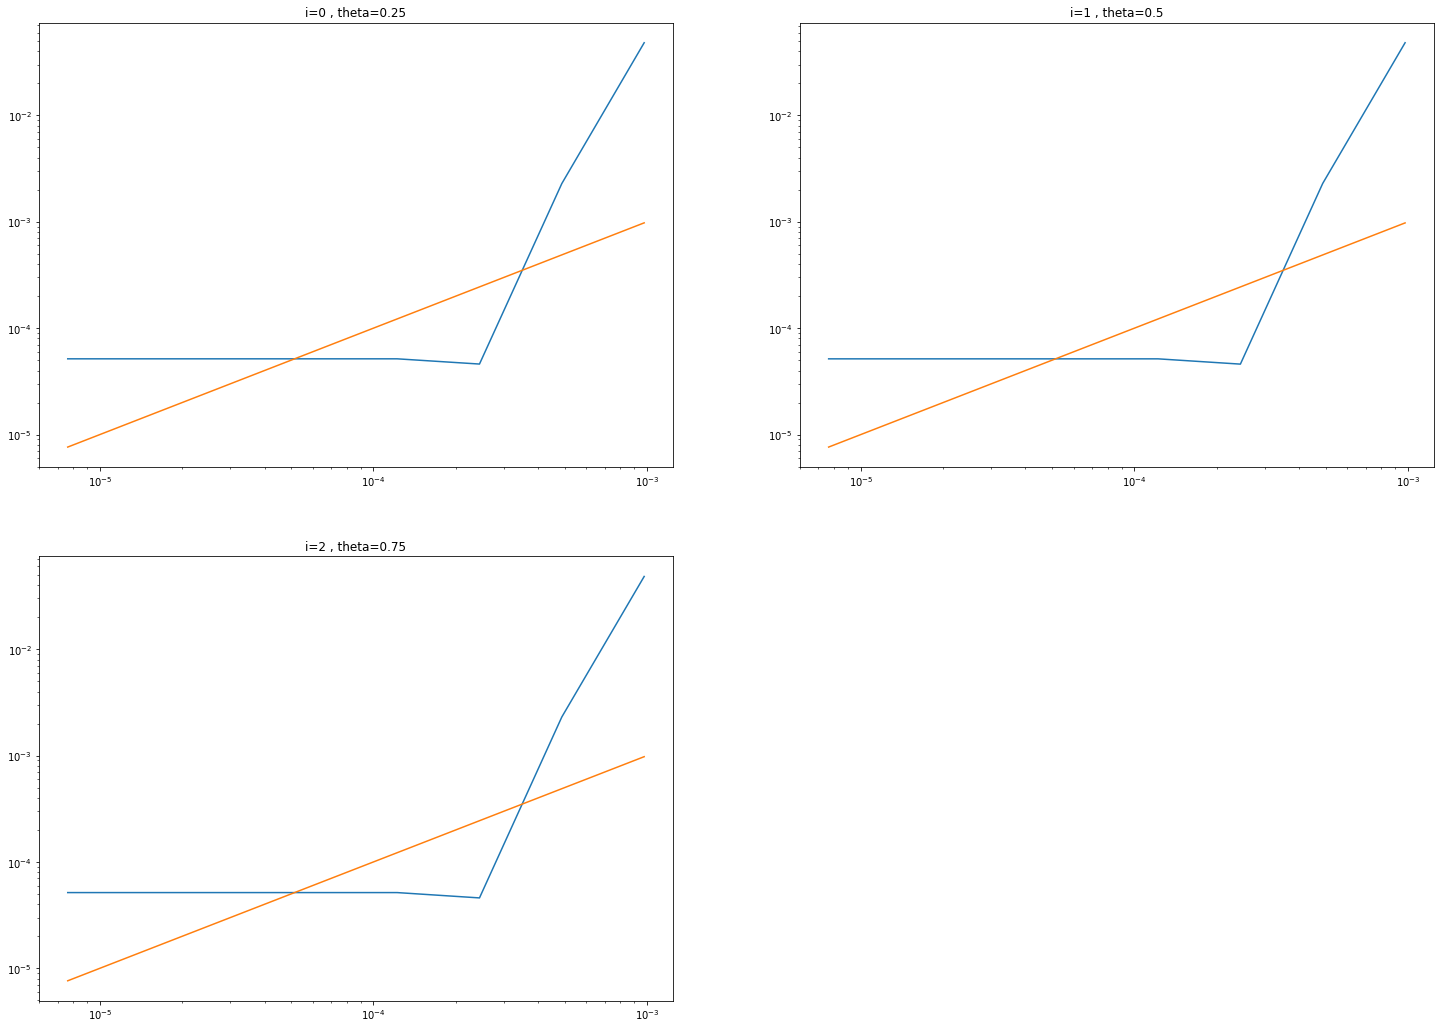

In [6]:
#On trace l'erreur de convergence en temps

MM = np.power(2,range(10,18))
N = 2**4 
h = 1/(N+1)
kk = 1/(MM)
err_tot_tps=[[],[],[]]
figure=plt.figure(figsize=(25,18))
for i, theta in enumerate([0.25, 0.50, 0.75],start=0):
    err_tot_tps[i] = [erreur(M,N,theta) for M in MM]
    plt.subplot(2,2,i+1)
    plt.title( f'i={i} , theta={theta}')
    plt.loglog(kk,err_tot_tps[i]) #tracé de l'erreur pour chaque theta
    plt.loglog(kk,kk) #comparaison d'ordre un en temps
    
#La convergence d'ordre 1 en temps ne semble pas avoir lieu.  

# 6) Pour $ \theta < 1/2 $ on a bien consistance d'ordre 1 en temps et d'ordre 2 en espace.

$\underline{\text{REMARQUES}}:$

Les schémas explicite, implicite et de Crank-Nicholson ne sont que des cas particuliers du \(\theta\)-schéma. Ce dernier partage des similitudes avec le schéma à 6 points. Bien que nous n'aborderons pas ce dernier dans ce projet, il est utile de le mentionner, car il peut offrir des perspectives supplémentaires.

Le schéma à 6 points, qui est d'ordre 2 en temps et 4 en espace, est le plus précis parmi les schémas que nous considérons.

Dans ce contexte, nous pouvons négliger les termes en $ o((\Delta t)^2) $ et $ o((\Delta x)^4) $.

Les développements que nous effectuerons se concentreront sur le voisinage du point $(t_n, x_i)$.

On fixe a=0; b=1.


$ \underline{RAPPEL}:\\ $
Une fonction f(h) est un “petit o” de $g(h) (f = o(g))$ si pour :$\\$
tout réel δ positif, aussi petit soit-il, on a $ |f(h)| ≤ C|g(h)|$ dès que $|h|$ est assez petit.


On pose $$ \normalsize
R_n^{i}= \frac{u(t_{n+1}, x_i ) − u(t_n, x_i )}{∆t} - \theta K \frac{u(t_{n+1}, x_{i+1})- 2u(t_{n+1}, x_i ) + u(t_{n+1}, x_{i-1})} {(∆x)^2} - (1-\theta)K \frac{u(t_{n}, x_{i+1})- 2u(t_{n}, x_i ) + u(t_{n}, x_{i-1})} {(∆x)^2}
$$

Soit u solution de l’EDP dont on suppose de classe $ \normalsize C^{\infty}$. on a par devellopement limité par rapport au temps:

$$ \normalsize
\frac{u(t_{n+1}, x_i ) − u(t_n, x_i )}{∆t} = (\frac{\partial{u}}{\partial{t}} +
\frac{\Delta{t}}{2} \frac{\partial^2{u}}{\partial{t}^2}+
\frac{(\Delta{t})^2}{6} \frac{\partial^3{u}}{\partial{t}^3})(t_n,x_i) + o((\Delta{t})^2))
$$

et comme  pour tout x,t ,
$$ \normalsize \frac{\partial u}{\partial t}(t,x) = K \frac{\partial^2 u}{\partial x^2}(t,x) $$, alors en remplacant dans notre expression on a:

$$ \normalsize
\frac{u(t_{n+1}, x_i ) − u(t_n, x_i )}{∆t} $$=$$( K \frac{\partial^2{u}}{\partial{x}^2}+
K^2\frac{\Delta{t}}{2} \frac{\partial^4{u}}{\partial{x}^4}+
K^3\frac{(\Delta{t})^2}{6} \frac{\partial^6{u}}{\partial{x}^6})(t_n,x_i) + o((\Delta{t})^2))
$$ 

Et par le méme raisonnement on obtient:


$ \newcommand{\fact}[1]{#1\mathpunct{}!}$
$$ \normalsize
\frac{u(t_{n}, x_{i+1})- 2u(t_{n}, x_i ) + u(t_{n}, x_{i-1})} {(\Delta{x})^2}=
 (\frac{\partial^2{u}}{\partial{x}^2}+
 \frac{(\Delta{x})^2}{12}\frac{\partial^4{u}}{\partial{x}^4}+
 2\frac{(\Delta{x})^4}{\fact{6}}\frac{\partial^6{u}}{\partial{x}^6}
 )(t_n,x_i) + o((\Delta{x})^4))
$$

En remplacant n par n + 1 dans l'expression precedente, on obtient suite avec un DL au voisinage de $ \normalsize (t_n,x_i)$

$$ \normalsize
\frac{u(t_{n+1}, x_{i+1})- 2u(t_{n+1}, x_i ) + u(t_{n+1}, x_{i-1})} {(∆x)^2}=
(\frac{\partial^2{u}}{\partial{x}^2}+
 \frac{(\Delta{x})^2}{12}\frac{\partial^4{u}}{\partial{x}^4}+
 2\frac{(\Delta{x})^4}{\fact{6}}\frac{\partial^6{u}}{\partial{x}^6}
 )(t_n,x_i) +
 \Delta{t}(\frac{\partial^3{u}}{\partial{t}\partial{x}^2}+ \frac{(\Delta{x})^2}{12} \frac{\partial^5{u}}{\partial{t}\partial{x}^4})(t_n,x_i) 
 +
 \frac{(\Delta{t})^2}{2}(\frac{\partial^4{u}}{\partial{t}^2\partial{x}^2})(t_n,x_i)\\ +
 o((\Delta{x})^4)+(\Delta{t})^2)
$$

Et donc par combinaison linéaire de mes differentes DL éffectuées, on peut se permettre d'écrire 

$$ \normalsize
R_n^{i}=\left(1-\theta-(1-\theta)\right)K\frac{\partial^2{u}}{\partial{x}^2} +
\left(K \frac{(\Delta{t})}{2}-
\theta \ (\frac{(\Delta{x})^2}{12} + K \Delta{t})-(1-\theta)\frac{(\Delta{x})^2}{12}\right)
K\frac{\partial^4{u}}{\partial{x}^4} +\\
\left(\frac{1}{6}-\frac{\theta}{2}\right)(\Delta{t})^2 K^3 \frac{\partial^6{u}}{\partial{x}^6}+
o((\Delta{x})^4)+(\Delta{t})^2)
$$

Aprés simplification, on aboutit à :

$$ = \normalsize \  \left(
(\frac{1}{2}-\theta)K\Delta{t}- 
\frac{(\Delta{x})^2}{12})K\frac{\partial^4{u}}{\partial{x}^4} +
(\frac{1}{6}-\frac{\theta}{2})(\Delta{t})^2 K^3 \frac{\partial^6{u}}{\partial{x}^6}
 \right)(t_n,x_i)
+\
o \left((\Delta{x})^2) \ +(\Delta{t})^2\right)
$$ $$(*)$$

Avec $(*)$ et la remarque, on a repondu à la question 6.\\\
En effet, si on applique le point de la remarque qui nous assure qu'on peut negligler tout ce qui est termes en $o((\Delta{t})^2)) $ et $o((\Delta{x})^4) $ à $(*)$ on obtient la consistance d'ordre 1 en temps et d'ordre 2 en espace.


# 7) Pour $ \theta=1/2 $


On pose $$ \normalsize
R_n^{i}= \frac{u(t_{n+1}, x_i ) − u(t_n, x_i )}{∆t} - \frac{1}{2} K \frac{u(t_{n+1}, x_{i+1})- 2u(t_{n+1}, x_i ) + u(t_{n+1}, x_{i-1})} {(∆x)^2} - \frac{1}{2} K \frac{u(t_{n}, x_{i+1})- 2u(t_{n}, x_i ) + u(t_{n}, x_{i-1})} {(∆x)^2}
$$

On va montrer, en effectuant des développements limités, que : $$|R_n^{i}|\leq C\left((\Delta{x})^2) \ +(\Delta{t})^2\right) $$

Posons $$R_1 = \frac{u(t_{n+1}, x_i ) − u(t_n, x_i )}{∆t} \ , R_2 = \frac{1}{2}  \frac{u(t_{n+1}, x_{i+1})- 2u(t_{n+1}, x_i ) + u(t_{n+1}, x_{i-1})} {(∆x)^2}\ et \ R_3 =  \frac{1}{2} \frac{u(t_{n}, x_{i+1})- 2u(t_{n}, x_i ) + u(t_{n}, x_{i-1})} {(∆x)^2} $$


$ a)\ \text{En effectuant un développement limité par rapport au temps on obtient :} \\ $

$$R_1 =  (\frac{\partial{u}}{\partial{t}} +
\frac{\Delta{t}}{2} \frac{\partial^2{u}}{\partial{t}^2}+
\frac{(\Delta{t})^2}{6} \frac{\partial^3{u}}{\partial{t}^3})(t_n,x_i) + o((\Delta{t})^2)) \ ie \\ $$

$ \text{ existe un réel}$ $r_1$ tel que :

$$R_1 =  (\frac{\partial{u}}{\partial{t}} +
\frac{\Delta{t}}{2} \frac{\partial^2{u}}{\partial{t}^2})(t_n,x_i) + r_1$ avec $|r_1|\leq C_1(\Delta{t})^2\ , C_1>0$$


$ b)\ \text{un développement limité par rapport à l'espace et avec le meme raisonnement que precedemment on obtient:} \\ $


$ \newcommand{\fact}[1]{#1\mathpunct{}!}$
$$ \normalsize
R_2= \frac{1}{2}\left(\frac{\partial^2{u}}{\partial{x}^2}(t_{n+1},x_i) + r_2\right) \ avec \ r_2 \leq C_2(\Delta{x})^2
$$

Or $$
\frac{\partial^2{u}}{\partial{x}^2}(t_{n+1},x_i) = \frac{\partial^2{u}}{\partial{x}^2}(t_{n},x_i) + 
\Delta{t} \frac{\partial^3{u}}{\partial{x}^2\partial{t}}(t_{n},x_i) + r_3
$$ $\text{avec}, |r_3|\leq  C_3(\Delta{t})^2 $

donc 
$$ R_2= \frac{1}{2}\left(\frac{\partial^2{u}}{\partial{x}^2}(t_{n},x_i) + 
\Delta{t} \frac{\partial^3{u}}{\partial{x}^2\partial{t}}(t_{n},x_i) + r_4 
\right) $$ 
$ \text{avec},\ |r_4|\leq  C_4(\Delta{t})^2 + \Delta{x})^2 $

$ c)\ \text{de meme on obtient:} \\ $


$ \newcommand{\fact}[1]{#1\mathpunct{}!}$
$$ \normalsize
R_3= \frac{1}{2}\left(\frac{\partial^2{u}}{\partial{x}^2}(t_{n},x_i) + r_5\right) \ avec \ r_5 \leq C_5(\Delta{x})^2
$$

$ \text {En regroupant, on obtient que } $

$$
R_n^{i}= \frac{\partial{u}}{\partial{t}}(t_n,x_i) - K\frac{\partial^2{u}}{\partial{x}^2}(t_{n},x_i)  +
K\frac {\Delta{t}}{2}\frac{\partial^2{u}}{\partial{t}^2\partial{t}}(t_{n},x_i)
-K\frac {\Delta{t}}{2}\frac{\partial^3{u}}{\partial{x}^2\partial{t}}(t_{n},x_i) +
r \\
$$
$ \text{avec},\ r = r_1+r_4+r_5  \  $

$ \text {donc le schema est d'ordre 2 en temps et en espace} $

En effet :

$$
\frac{\partial u}{\partial t}(t,x) = K \frac{\partial^2 u}{\partial x^2}(t,x) \text{ et donc} \\
K\frac {\Delta{t}}{2}\frac{\partial^2{u}}{\partial{t}^2\partial{t}}(t_{n},x_i)
-K\frac {\Delta{t}}{2}\frac{\partial^3{u}}{\partial{x}^2\partial{t}}(t_{n},x_i) =
\frac {\Delta{t}}{2}K \left(\frac{\partial{u}}{\partial{t}}(t_{n},x_i) - \frac{\partial^2{u}}{\partial{x}^2}(t_{n},x_i)\right)
$$

$ \text {par consequent}  $ 


$$
|R_n^{i}|=|r_1+r_4+r_5 | \\
          \leq |r_1|+|r_4|+|r_5| \\
                          \leq C_1((\Delta{t})^2)+C_4((\Delta{t})^2+(\Delta{x})^2)+C_5((\Delta{x})^2)\\
                         \leq C\left(\Delta{t})^2+\Delta{x})^2\right) \\
$$
$ avec \ C=max(C_k) ,\ k = {1,4,5}$

$CQFD $

# REMARQUES: 

Le calcul de l'erreur de consistance peut rapidement devenir complexe si l'on ne procède pas de manière méthodique et organisée. Les calculs peuvent devenir obscurs, et leur coût peut croître de manière exponentielle en fonction de l'ordre à déterminer.

Pour éviter ces pièges, il est recommandé de suivre les étapes suivantes :
1. **Développement de Taylor** : Développez tous les termes du schéma au même point à l'aide des formules de Taylor. Bien que le point choisi n'influence pas l'ordre du schéma, il affecte la taille des calculs. 
2. **Division des calculs** : Il est conseillé de diviser les calculs en plusieurs étapes, ce qui permet de réutiliser les développements d'une étape à une autre.
3. **Utilisation de l'équation de la solution** : Simplifiez les calculs en utilisant l'équation vérifiée par la solution (par exemple, en remplaçant les dérivées temporelles par des dérivées spatiales). Cela facilite la détermination de l'ordre optimal du schéma.
4. **Exploitation des symétries** : Utilisez les symétries du schéma, car elles peuvent impliquer que seuls certains termes (pairs ou impairs) sont non nuls dans le développement.

### Remarque sur la Partie Numérique

Concernant la partie numérique, la question 2 de ce projet est un pseudo-code, il est donc inutile de l'exécuter.

### Modification des Valeurs Initiales

Dans ce projet, les valeurs initialement fournies pour $\Delta t$ ont été modifiées car aucune d'entre elles ne permettait de tester la divergence du schéma pour $\theta = 0.25$. Au lieu de cela, nous avons cherché une valeur limite $\Delta t_{\text{lim}}$ pour $\theta = 0.25$ et $T = 1$, telle que :
- Pour $\Delta t \geq \Delta t_{\text{lim}}$, le schéma diverge.
- Pour $\Delta t < \Delta t_{\text{lim}}$, le schéma converge.

Nous avons ensuite tracé des graphiques pour des valeurs de $\Delta t$ autour de cette valeur limite, c'est-à-dire juste en dessous et juste au-dessus. Pour $\theta = 0.75$ et ces mêmes valeurs de $\Delta t$, nous avons constaté que le schéma convergeait toujours. Cela indique que $\Delta t$ et $\theta$ influencent simultanément la convergence du schéma.

### Observations sur la Convergence

Dans la question 5, comme aucune valeur de $\Delta t$ n'était proposée, nous avons utilisé $\Delta t = 0.0003$, ce qui correspond à un cas où le schéma converge $\Delta t \leq \Delta t_{\text{lim}}$. Nous avons observé l'ordre de convergence pour différentes valeurs de $\theta$ ($\theta = 0.25, 0.5, 0.75$). Ces observations ont confirmé que le schéma est bien d'ordre 2 en espace, mais n'ont pas démontré qu'il est d'ordre 1 en temps.


# Sources de documentation utilisées :

https://perso.univ-lyon1.fr/marc.buffat/COURS/COURSDF_HTML/node12.html


https://perso.univ-lyon1.fr/marc.buffat/COURS/COURSDF_HTML/node20.html

http://dspace.univ-eloued.dz/bitstream/123456789/9734/1/sch%C3%A9ma%20de%20crank-nicolson%20pour%20la%20r%C3%A9solution%20num%C3%A9rique%20d%27une%20EDP%20parabolique.pdf